# Проект - "Определение перспективного тарифа для телеком-компании".

## 1 Описание проекта.

Опишем общую информацию о заказчике, план проекта и цели.

**Общая информация о заказчике и данных:**

Компании «Мегалайн» — федерального оператора сотовой связи. Клиентам предлагают два тарифных плана: «Смарт» и «Ультра». 
В нашем распоряжении данные 500 пользователей «Мегалайна»: кто они, откуда, каким тарифом пользуются, сколько звонков и сообщений каждый отправил за 2018-й год. 

**Цель проекта:**

Чтобы скорректировать рекламный бюджет, коммерческий департамент хочет понять, какой тариф приносит больше денег.


**Задачи:**

Предстоит сделать предварительный анализ тарифов на небольшой выборке клиентов. Нужно проанализировать поведение клиентов и сделать вывод — какой тариф лучше. 


**План проекта:**

1. Описание проекта
2. Загрузка данных и изучение общей информации.
3. Предобработка данных.
4. Исследовательский анализ данных.
5. Проверка гипотез.
6. Общие выводы.

## 2 Загрузка данных и изучение общей информации. 

Импортируем необходимые библиотеки, выведем основную информацию о датафрейме, проверим данные на дубликаты и пропуски. 

### 2.1 Звонки.

In [1]:
# Импортируем необходимые библиотеки.

import pandas as pd
import numpy as np
import seaborn as sns
import re
pd.set_option('display.max_columns', 0)
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
from scipy import stats as st 
import warnings 

# отключаем предупреждения
warnings.filterwarnings('ignore') 

In [2]:
calls = pd.read_csv('/Users/Ильдар/Desktop/Проекты в юпитере/Статистический анализ/calls.csv') # сохраним датафрейм в переменную calls

In [3]:
calls.head() # выведем первые 5 строк датафрейма

,id,call_date,duration,user_id
0,1000_0,2018-07-25,0.00,1000
1,1000_1,2018-08-17,0.00,1000
2,1000_2,2018-06-11,2.85,1000
3,1000_3,2018-09-21,13.80,1000
4,1000_4,2018-12-15,5.18,1000


Перед нами таблица `calls` — содержашая информация о звонках, 4 столбца:
- `id` — уникальный номер звонка;
- `call_date` — дата звонка;
- `duration` — длительность звонка в минутах;
- `user_id` — идентификатор пользователя, сделавшего звонок.

Все названия в нижнем "змеином" регистре - редактирование не требуется. 

In [4]:
calls.info() # выведем основную информацию для датафрейма calls

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         202607 non-null  object 
 1   call_date  202607 non-null  object 
 2   duration   202607 non-null  float64
 3   user_id    202607 non-null  int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 6.2+ MB


Столбцы - `id` и  `call_date` имеют тип **object**, `call_date` надо сменить на тип для времени. `duration`и `user_id` имеют тип числовой.  В данных есть звонки с нулевой продолжительностью: нулями обозначены пропущенные звонки, поэтому их не нужно удалять.

In [5]:
calls.duplicated().sum() # выведем количество дубликатов

0

In [6]:
calls.isna().sum() # проверим пропуски в таблице

id           0
call_date    0
duration     0
user_id      0
dtype: int64

В таблице `calls` дубликатов и пропусков нет. 

### 2.2 Интернет.

In [7]:
sessions = pd.read_csv('/Users/Ильдар/Desktop/Проекты в юпитере/Статистический анализ/internet.csv') # сохраним датафрейм в переменную sessions

In [8]:
sessions.head() # выведем первые 5 строк датафрейма

,Unnamed: 0,id,mb_used,session_date,user_id
0,0,1000_0,112.95,2018-11-25,1000
1,1,1000_1,1052.81,2018-09-07,1000
2,2,1000_2,1197.26,2018-06-25,1000
3,3,1000_3,550.27,2018-08-22,1000
4,4,1000_4,302.56,2018-09-24,1000


Перед нами таблица `sessions` — содержашая информация об использование интернета, 5 столбца:
- `Unnamed: 0` — столбец с таким названием возникает, когда данные сохраняют с указанием индекса, его в дальнейшем нужно будет удалить;
- `id` — уникальный номер сессии;
- `mb_used` — объём потраченного за сессию интернет-трафика (в мегабайтах);
- `session_date` — дата интернет-сессии;
- `user_id` — идентификатор пользователя.

Все названия в нижнем "змеином" регистре - редактирование не требуется.

In [9]:
sessions.info() # выведем основную информацию для датафрейма sessions

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Unnamed: 0    149396 non-null  int64  
 1   id            149396 non-null  object 
 2   mb_used       149396 non-null  float64
 3   session_date  149396 non-null  object 
 4   user_id       149396 non-null  int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 5.7+ MB


Столбцы - `id` и  `session_date` имеют тип **object**, `session_date` надо сменить на тип для времени. `mb_used`и `user_id` имеют тип числовой. 

In [10]:
sessions.duplicated().sum() # выведем количество дубликатов

0

In [11]:
sessions.isna().sum() # проверим пропуски в таблице

Unnamed: 0      0
id              0
mb_used         0
session_date    0
user_id         0
dtype: int64

В таблице `sessions` дубликатов и пропусков нет. 

### 2.3 Сообщения.

In [12]:
messages = pd.read_csv('/Users/Ильдар/Desktop/Проекты в юпитере/Статистический анализ/messages.csv') # сохраним датафрейм в переменную messages

In [13]:
messages.head() # выведем первые 5 строк датафрейма

,id,message_date,user_id
0,1000_0,2018-06-27,1000
1,1000_1,2018-10-08,1000
2,1000_2,2018-08-04,1000
3,1000_3,2018-06-16,1000
4,1000_4,2018-12-05,1000


Перед нами таблица `calls` — содержашая информация о звонках, 3 столбца:
- `id` — уникальный номер;
- `message_date` — ддата сообщения;
- `user_id` — идентификатор пользователя, сделавшего звонок.

Все названия в нижнем "змеином" регистре - редактирование не требуется.

In [14]:
messages.info() # выведем основную информацию для датафрейма messages

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            123036 non-null  object
 1   message_date  123036 non-null  object
 2   user_id       123036 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 2.8+ MB


Столбцы - `id` и  `message_date` имеют тип **object**, `message_date` надо сменить на тип для времени. `user_id` имеет тип числовой. 

In [15]:
messages.duplicated().sum() # выведем количество дубликатов

0

In [16]:
messages.isna().sum() # проверим пропуски в таблице

id              0
message_date    0
user_id         0
dtype: int64

В таблице `messages` дубликатов и пропусков нет. 

### 2.4 Тарифы.

In [17]:
tariffs = pd.read_csv('/Users/Ильдар/Desktop/Проекты в юпитере/Статистический анализ/tariffs.csv') # сохраним датафрейм в переменную tariffs

In [18]:
tariffs # выведем весь датафрейм tariffs

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


Перед нами таблица `tariffs` — содержашая информация о звонках, 8 столбцов:

- `tariff_name` — название тарифа;
- `rub_monthly_fee` — ежемесячная абонентская плата в рублях;
- `minutes_included` — количество минут разговора в месяц, включённых в абонентскую плату;
- `messages_included` — количество сообщений в месяц, включённых в абонентскую плату;
- `mb_per_month_included` — объём интернет-трафика, включённого в абонентскую плату (в мегабайтах);
- `rub_per_minute` — стоимость минуты разговора сверх тарифного пакета (например, если в тарифе 100 минут разговора в месяц, то со 101 минуты будет взиматься плата);
- `rub_per_message` — стоимость отправки сообщения сверх тарифного пакета;
- `rub_per_gb` — стоимость дополнительного гигабайта интернет-трафика сверх тарифного пакета (1 гигабайт = 1024 мегабайта);

**Тариф «Смарт»**
- Ежемесячная плата: 550 рублей;
- Включено 500 минут разговора, 50 сообщений и 15 Гб интернет-трафика;
- Минута разговора — 3 рубля;
- Сообщение — 3 рубля;
- 1 Гб интернет-трафика — 200 рублей.

**Тариф «Ультра»**
- Ежемесячная плата: 1950 рублей;
- Включено 3000 минут разговора, 1000 сообщений и 30 Гб интернет-трафика;
- Минута разговора — 1 рубль;
- Сообщение — 1 рубль;
- 1 Гб интернет-трафика: 150 рублей.

Все названия в нижнем "змеином" регистре - редактирование не требуется. Дубликатов и пропусков нет.

In [19]:
tariffs.info() # выведем основную информацию для датафрейма tariffs

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   messages_included      2 non-null      int64 
 1   mb_per_month_included  2 non-null      int64 
 2   minutes_included       2 non-null      int64 
 3   rub_monthly_fee        2 non-null      int64 
 4   rub_per_gb             2 non-null      int64 
 5   rub_per_message        2 non-null      int64 
 6   rub_per_minute         2 non-null      int64 
 7   tariff_name            2 non-null      object
dtypes: int64(7), object(1)
memory usage: 256.0+ bytes


Столбец `tariff_name` имеют тип **object**, остальные - имеет тип числовой. 

### 2.5 Пользователи.

In [20]:
users = pd.read_csv('/Users/Ильдар/Desktop/Проекты в юпитере/Статистический анализ/users.csv') # сохраним датафрейм в переменную users

In [21]:
users.head() # выведем первые 5 строк датафрейма

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,NaN,Москва,Иван,Ежов,2018-11-01,smart
2,1002,59,NaN,Стерлитамак,Евгений,Абрамович,2018-06-17,smart
3,1003,23,NaN,Москва,Белла,Белякова,2018-08-17,ultra
4,1004,68,NaN,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra


Перед нами таблица `users` — содержашая информация о звонках, 8 столбцов:
- `user_id` — уникальный идентификатор пользователя;
- `first_name` — имя пользователя;
- `last_name` — фамилия пользователя;
- `age` — возраст пользователя (годы);
- `reg_date` — дата подключения тарифа (день, месяц, год);
- `churn_date` — дата прекращения пользования тарифом (если значение пропущено, значит, тариф ещё действовал на момент выгрузки данных);
- `city` — город проживания пользователя;
- `tarif` — название тарифного плана.

Все названия в нижнем "змеином" регистре - редактирование не требуется.

In [22]:
users.info() # выведем основную информацию для датафрейма users

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   age         500 non-null    int64 
 2   churn_date  38 non-null     object
 3   city        500 non-null    object
 4   first_name  500 non-null    object
 5   last_name   500 non-null    object
 6   reg_date    500 non-null    object
 7   tariff      500 non-null    object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


Столбцы - `user_id` и  `age` имеют тип числовой, остальные -  **object**, `churn_date` и `reg_date` надо сменить на тип для времени. Всего 500 строк в таблице. 

In [23]:
users.duplicated().sum() # выведем количество дубликатов

0

In [24]:
users.isna().sum() # проверим пропуски в таблице

user_id         0
age             0
churn_date    462
city            0
first_name      0
last_name       0
reg_date        0
tariff          0
dtype: int64

В таблице `users` дубликатов нет. Есть пропукси в столбце `churn_date` - 462 шт. 

In [25]:
round((users.isna().mean()*100),2) # узнайте процент пропущенных значений в каждом столбце

user_id        0.0
age            0.0
churn_date    92.4
city           0.0
first_name     0.0
last_name      0.0
reg_date       0.0
tariff         0.0
dtype: float64

**Вывод:** Данные содержат информцию о пользователях, звонках, сообщения, использование интренета и тарифах. Всего 5 таблиц. Все названия в таблицах в нижнем "змеином" регистре - редактирование не требуется. 

В таблице `users` есть пропукси в столбце `churn_date` - 92,4%.  В остальных - дубликатов и пропусков нет. 

Для дальнейшей работы с датсетом необходимо изменить типы данных.

## 3 Предобработка данных. 

### 3.1 Типы.

Приведем столбцы 
- `reg_date` и `churn_date` из таблицы `users`;
- `call_date` из таблицы `calls`;
- `message_date` из таблицы `messages`;
- `session_date` из таблицы `sessions`

к новому типу с помощью метода to_datetime().

In [26]:
users['reg_date'] = pd.to_datetime(users['reg_date'], format='%Y-%m-%d') # обработка столбца reg_date
users['churn_date'] = pd.to_datetime(users['churn_date'], format='%Y-%m-%d') # обработка столбца churn_date

calls['call_date'] = pd.to_datetime(calls['call_date'], format='%Y-%m-%d') # обработка столбца call_date

messages['message_date'] = pd.to_datetime(messages['message_date'], format='%Y-%m-%d') # обработка столбца message_date

sessions['session_date'] = pd.to_datetime(sessions['session_date'], format='%Y-%m-%d') # обработка столбца session_date

В столбце `duration` датафрейма `calls` значения дробные. т.к. «Мегалайн» всегда округляет секунды до минут - округлим значения столбца `duration` вверх с помощью метода numpy.ceil() и приведем столбец `duration` к типу **int**.

In [27]:
calls['duration'] = np.ceil(calls['duration']).astype('int')

### 3.2 Столбцы. 

Удалим столбец `Unnamed: 0` из датафрейма `sessions`.

In [28]:
sessions = sessions.drop(columns=['Unnamed: 0'])

Так как в дальнейшем для анализа нам понадобятся данные по месяцам, добавим в таблицы с информацией о звонках, сообщениях и интернет-траффике в соответсвующие столбцы. 

In [29]:
calls['month'] = pd.to_datetime(calls['call_date']).dt.month # созадим столбец month в таблице calls
messages['month'] = pd.to_datetime(messages['message_date']).dt.month # созадим столбец month в таблице messages
sessions['month'] = pd.to_datetime(sessions['session_date']).dt.month # созадим столбец month в таблице sessions

### 3.3 Подсчёт выручки и сборка датасета. 

Собрем данные в один датафрейм `user_behavior`, где каждой пары "пользователь - месяц" будут доступны информация о тарифе, количестве звонков, сообщений и потраченных мегабайтах. Предварительно сгруппируем таблицы по пользователям. 

In [30]:
# расчитаем по месяцам количество сделанных звонков и израсходованных минут разговора
calls_per_month = calls.pivot_table(index=['user_id', 'month'], values='duration', aggfunc=['count', 'sum'])
calls_per_month.columns = ['calls', 'minutes']
calls_per_month.sample(5)

,,calls,minutes
user_id,month,,
1051,10,16,123
1071,5,52,365
1131,12,38,263
1093,9,106,825
1148,12,123,835


In [31]:
# расчитаем по месяцам количество отправленных сообщений
messages_per_month = messages.pivot_table(index=['user_id', 'month'], values='id', aggfunc='count')
messages_per_month.columns = ['messages']
messages_per_month.sample(5)

,,messages
user_id,month,
1393,9,54
1294,5,27
1495,11,79
1087,12,38
1218,9,25


In [32]:
# расчитаем по месяцам объем израсходованного интернет-трафика по месяцам
sessions_per_month = sessions.pivot_table(index=['user_id', 'month'], values='mb_used', aggfunc='sum')
sessions_per_month.columns = ['mb_used']
sessions_per_month.sample(5)

,,mb_used
user_id,month,
1168,5,26096.63
1059,5,21392.57
1478,11,17759.83
1245,11,9764.99
1176,2,13715.94


In [33]:
user_behavior = calls_per_month\
    .merge(messages_per_month, left_index=True, right_index=True, how='outer')\
    .merge(sessions_per_month, left_index=True, right_index=True, how='outer')\
    .reset_index()\
    .merge(users, how='left', left_on='user_id', right_on='user_id')\

user_behavior.head()

,user_id,month,calls,minutes,messages,mb_used,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,5,22.0,159.0,22.0,2253.49,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1000,6,43.0,172.0,60.0,23233.77,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
2,1000,7,47.0,340.0,75.0,14003.64,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
3,1000,8,52.0,408.0,81.0,14055.93,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
4,1000,9,58.0,466.0,57.0,14568.91,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra


Проверим пропуски в таблице `user_behavior` после объединения:

In [34]:
user_behavior.isna().sum()

user_id          0
month            0
calls           40
minutes         40
messages       497
mb_used         11
age              0
churn_date    3027
city             0
first_name       0
last_name        0
reg_date         0
tariff           0
dtype: int64

In [35]:
# заполним образовавшиеся пропуски в данных
for column in ('calls', 'minutes', 'messages', 'mb_used'):
    user_behavior[column] = user_behavior[column].fillna(0)

Присоединяем информацию о тарифах

In [36]:
# переименование столбца tariff_name на более простое tariff

tariffs = tariffs.rename(
    columns={
        'tariff_name': 'tariff'
    }
)

In [37]:
user_behavior = user_behavior.merge(tariffs, on='tariff')

Считаем количество минут разговора, сообщений и мегабайт, превышающих включенные в тариф

In [38]:
user_behavior['paid_minutes'] = user_behavior['minutes'] - user_behavior['minutes_included']
user_behavior['paid_messages'] = user_behavior['messages'] - user_behavior['messages_included']
user_behavior['paid_mb'] = user_behavior['mb_used'] - user_behavior['mb_per_month_included']

for col in ['paid_messages', 'paid_minutes', 'paid_mb']:
    user_behavior.loc[user_behavior[col] < 0, col] = 0

Переводим превышающие тариф мегабайты в гигабайты и сохраняем в столбец paid_gb

In [39]:
user_behavior['paid_gb'] = np.ceil(user_behavior['paid_mb'] / 1024).astype(int)

Считаем выручку за минуты разговора, сообщения и интернет

In [40]:
user_behavior['cost_minutes'] = user_behavior['paid_minutes'] * user_behavior['rub_per_minute']
user_behavior['cost_messages'] = user_behavior['paid_messages'] * user_behavior['rub_per_message']
user_behavior['cost_gb'] = user_behavior['paid_gb'] * user_behavior['rub_per_gb']

Считаем помесячную выручку с каждого пользователя, она будет храниться в столбец total_cost

In [41]:
user_behavior['total_cost'] = \
      user_behavior['rub_monthly_fee']\
    + user_behavior['cost_minutes']\
    + user_behavior['cost_messages']\
    + user_behavior['cost_gb']

In [42]:
user_behavior.pivot_table(index=['user_id', 'month']) # выведем сводную таблицу по пользователям и месяцам 

age  calls  cost_gb  cost_messages  ...  rub_per_gb  rub_per_message  rub_per_minute  total_cost
user_id month                                      ...                                                         
1000    5       52   22.0        0            0.0  ...         150                1               1      1950.0
        6       52   43.0        0            0.0  ...         150                1               1      1950.0
        7       52   47.0        0            0.0  ...         150                1               1      1950.0
        8       52   52.0        0            0.0  ...         150                1               1      1950.0
        9       52   58.0        0            0.0  ...         150                1               1      1950.0
...            ...    ...      ...            ...  ...         ...              ...             ...         ...
1498    10      68   41.0     1200            0.0  ...         200                3               3      1750.0
1499    9       35    9.0        0            0.0  ...         200                3               3       550.0
        10      35   68.0      600            0.0  ...         200                3               3      1150.0
        11      35   74.0      600           27.0  ...         200                3               3      1513.0
        12      35   69.0        0           48.0  ...         200                3               3       598.0

[3214 rows x 20 columns]

**Вывод:** Изменили типы данных, удалили лишний столбец и добавили новые в каждую таблицу новые столбцы с указанием номера месяца. Далее подсчитали выручку по каждому клиенту и собрали данные в один датасет. Пропуски после объединения заполнили нулями, т.к. предположим, что не все клиенты используют функции своего тарифа, например кто-то только для звонков или наоборот для интернета. 

## 4 Анализ данных.

### 4.1 Основные характерикстики.

Датафрейм `stats_df` для каждой пары "месяц-тариф" будет хранить основные характеристики.

In [43]:
# сохранение статистических метрик для каждой пары месяц-тариф
# в одной таблице stats_df (среднее значение, стандартное отклонение, медиана)

stats_df = user_behavior.pivot_table(
            index=['month', 'tariff'],\
            values=['calls', 'minutes', 'messages', 'mb_used'],\
            aggfunc=['mean', 'std', 'median']\
).round(2).reset_index()

stats_df.columns=['month', 'tariff', 'calls_mean', 'sessions_mean', 'messages_mean', 'minutes_mean',
                                     'calls_std',  'sessions_std', 'messages_std', 'minutes_std', 
                                     'calls_median', 'sessions_median', 'messages_median',  'minutes_median']

stats_df.head(10)

,month,tariff,calls_mean,sessions_mean,messages_mean,minutes_mean,calls_std,sessions_std,messages_std,minutes_std,calls_median,sessions_median,messages_median,minutes_median
0,1,smart,27.68,8513.72,18.24,203.85,20.81,6444.68,16.20,154.23,20.5,7096.18,15.0,162.5
1,1,ultra,59.44,13140.68,33.78,428.11,41.64,6865.35,30.67,269.76,51.0,14791.37,32.0,382.0
2,2,smart,40.19,11597.05,24.09,298.69,25.39,6247.35,21.75,190.82,38.5,12553.71,20.0,258.0
3,2,ultra,41.54,11775.94,21.96,297.12,40.97,10644.64,26.77,296.51,25.0,7327.12,5.5,168.0
4,3,smart,54.32,15104.16,31.86,390.05,25.54,5828.24,26.80,191.89,59.0,15670.25,23.0,409.0
5,3,ultra,67.68,17535.55,32.30,489.65,44.84,10951.79,41.62,333.74,57.0,17495.18,20.0,403.0
6,4,smart,51.31,13462.18,30.74,367.13,25.70,5698.25,24.54,186.49,52.0,14087.65,28.0,368.5
7,4,ultra,64.09,16828.13,31.56,458.02,36.27,9718.65,37.51,267.68,61.0,16645.78,17.0,453.0
8,5,smart,55.24,15805.18,33.77,387.36,25.38,5978.23,27.04,186.60,59.0,16323.94,30.0,433.0
9,5,ultra,72.51,19363.15,37.85,510.33,41.08,10046.11,40.31,289.60,75.0,18696.43,25.0,519.0


### 4.2 Распределение среднего количества звонков по видам тарифов и месяцам.

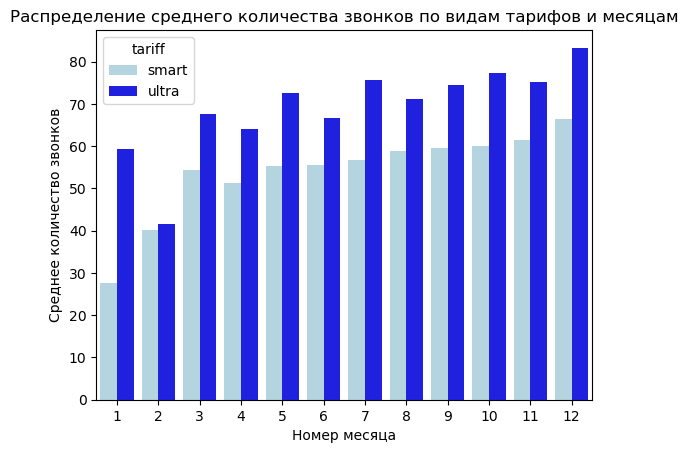

In [44]:
ax = sns.barplot(x='month',
            y='calls_mean',
            hue="tariff",
            data=stats_df,
            palette=['lightblue', 'blue'])

ax.set_title('Распределение среднего количества звонков по видам тарифов и месяцам')
ax.set(xlabel='Номер месяца', ylabel='Среднее количество звонков');

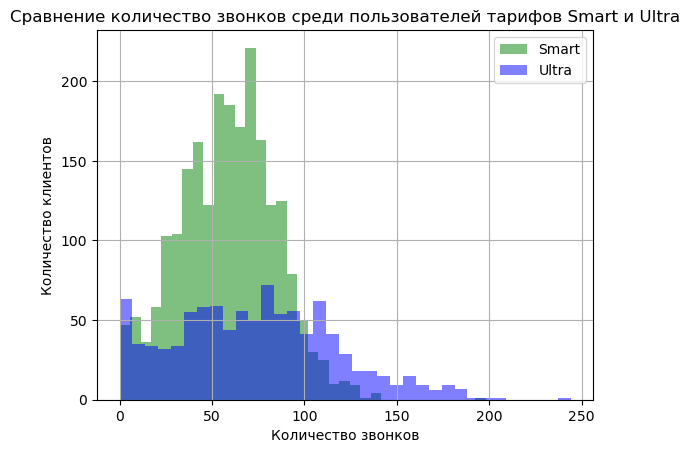

In [45]:
user_behavior[user_behavior['tariff'] =='smart']['calls'].hist(bins=35, alpha=0.5, color='green')
user_behavior[user_behavior['tariff'] =='ultra']['calls'].hist(bins=35, alpha=0.5, color='blue')
plt.title('Сравнение количество звонков среди пользователей тарифов Smart и Ultra')
plt.legend(['Smart', 'Ultra'])
plt.xlabel('Количество звонков')
plt.ylabel('Количество клиентов')
plt.show();

Среднее количество звонков у абонентов тарифа Ultra больше, чем у абонентов тарифа Smart. В течение года пользователи обоих тарифов увеличивают среднее количество звонков. Рост среднего количества звонков у абонентов тарифа Smart более равномерный в течение года. Пользователи тарифа Ultra не проявляют подобной линейной стабильности. В феврале у абонентов Ultra наблюдались самые низкие показатели, они почти сравнялись с показателями абонентов тарифа Smart.

### 4.3 Распределение средней продолжительности звонков по видам тарифов и месяцам.

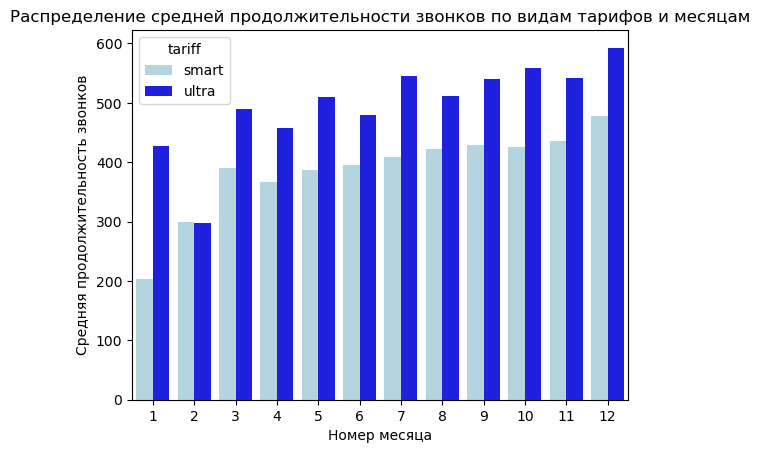

In [46]:
ax = sns.barplot(x='month',
            y='minutes_mean',
            hue="tariff",
            data=stats_df,
            palette=['lightblue', 'blue'])

ax.set_title('Распределение средней продолжительности звонков по видам тарифов и месяцам')
ax.set(xlabel='Номер месяца', ylabel='Средняя продолжительность звонков');

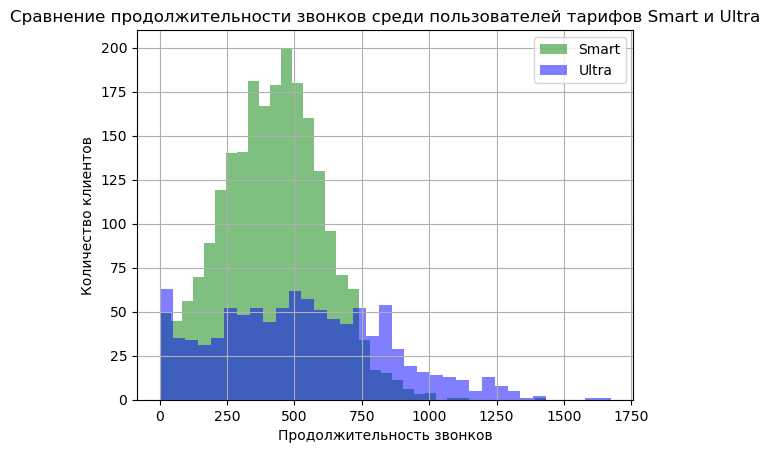

In [47]:
user_behavior[user_behavior['tariff'] =='smart']['minutes'].hist(bins=35, alpha=0.5, color='green')
user_behavior[user_behavior['tariff'] =='ultra']['minutes'].hist(bins=35, alpha=0.5, color='blue')
plt.title('Сравнение продолжительности звонков среди пользователей тарифов Smart и Ultra')
plt.legend(['Smart', 'Ultra'])
plt.xlabel('Продолжительность звонков')
plt.ylabel('Количество клиентов')
plt.show();

Средняя длительность разговоров у абонентов тарифа Ultra больше, чем у абонентов тарифа Smart. В течение года пользователи обоих тарифов увеличивают среднюю продолжительность своих разговоров. Рост средней длительности разговоров у абонентов тарифа Smart более равномерный в течение года. Пользователи тарифа Ultra не проявляют подобной линейной стабильности. Стоит отметить, что в феврале у абонентов Ultra наблюдались самые низкие показатели, они почти сравнялись с показателями абонентов тарифа Smart. 

### 4.4 Распределение среднего количества сообщений по видам тарифов и месяцам. 

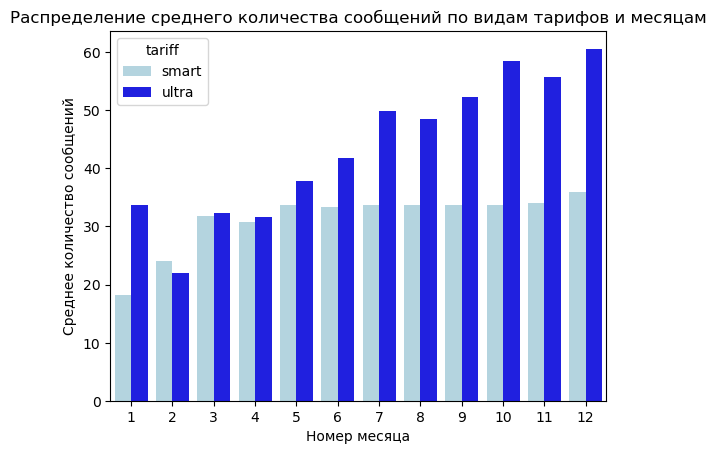

In [48]:
ax = sns.barplot(x='month',
            y='messages_mean',
            hue="tariff",
            data=stats_df,
            palette=['lightblue', 'blue']
)

ax.set_title('Распределение среднего количества сообщений по видам тарифов и месяцам')
ax.set(xlabel='Номер месяца', ylabel='Среднее количество сообщений');

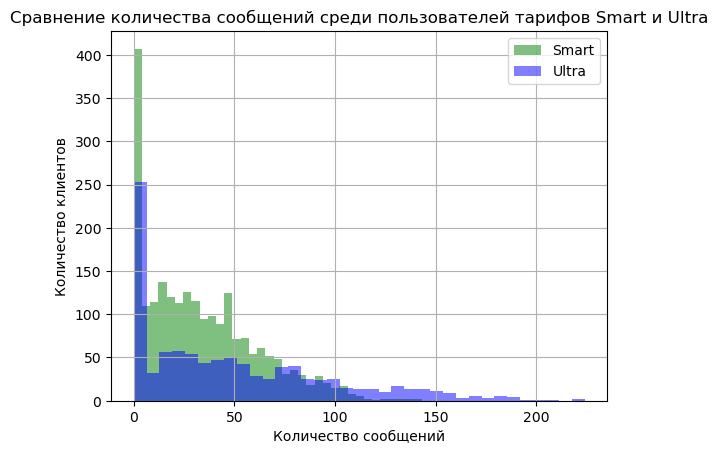

In [49]:
user_behavior[user_behavior['tariff'] =='smart']['messages'].hist(bins=35, alpha=0.5, color='green')
user_behavior[user_behavior['tariff'] =='ultra']['messages'].hist(bins=35, alpha=0.5, color='blue')
plt.title('Сравнение количества сообщений среди пользователей тарифов Smart и Ultra')
plt.legend(['Smart', 'Ultra'])
plt.xlabel('Количество сообщений')
plt.ylabel('Количество клиентов')
plt.show();

В среднем количество сообщений пользователи тарифа Ultra отправляют больше - почти на 20 сообщений больше, чем пользователи тарифа Smart. Количество сообщений в течение года на обоих тарифак растет. Динамика по отправке сообщений схожа с тенденциями по длительности разговоров: в феврале отмечено наименьшее количество сообщений за год и пользователи тарифа Ultra также проявляют нелинейную положительную динамику.

### 4.5 Распределение среднего количества потраченного трафика по видам тарифов и месяцам.

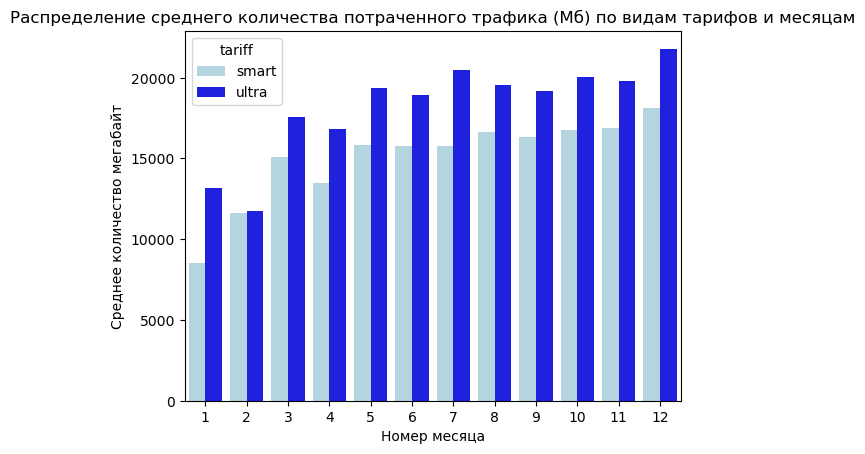

In [50]:
ax = sns.barplot(x='month',
            y='sessions_mean',
            hue="tariff",
            data=stats_df,
            palette=['lightblue', 'blue']
)

ax.set_title('Распределение среднего количества потраченного трафика (Мб) по видам тарифов и месяцам')
ax.set(xlabel='Номер месяца', ylabel='Среднее количество мегабайт');

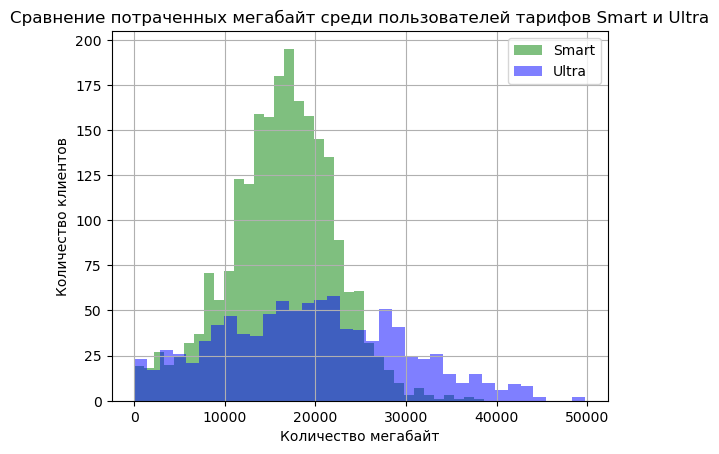

In [51]:
user_behavior[user_behavior['tariff'] =='smart']['mb_used'].hist(bins=35, alpha=0.5, color='green')
user_behavior[user_behavior['tariff'] =='ultra']['mb_used'].hist(bins=35, alpha=0.5, color='blue')
plt.title('Сравнение потраченных мегабайт среди пользователей тарифов Smart и Ultra')
plt.legend(['Smart', 'Ultra'])
plt.xlabel('Количество мегабайт')
plt.ylabel('Количество клиентов')
plt.show();

Меньше всего пользователи использовали интернет в январе, феврале и апреле. Чаще всего абоненты тарифа Smart тратят 15-17 Гб, а абоненты тарифного плана Ultra - 19-21 ГБ.

**Вывод:**  При сравнении двух тарифов выяснили, что в тарифе Ultra в среднем наблюдается больший расход минут (на 25,93%), сообщений (на 47,78%) и интернет-трафика (на 19,32%). При этом в тарифе Smart расходуют минимум 3 ГБ интернета в месяц, в тарифе Ultra могут не пользоваться интернетом вообще.

## 5 Проверка гипотез.

###  5.1 Гипотеза 1.

Проверим, есть ли статистически значимое **различие в средней выручке** между клиентами на тарифах «Ультра» и «Смарт».

В качестве нулевой и альтернативной гипотезы мы взяли следующее:

- **H0:** статистически значимых **различий в средней выручке** между клиентами на тарифах «Ультра» и «Смарт» **нет**.

- **H1:** статистически значимые **различия в средней выручке** между клиентами на тарифах «Ультра» и «Смарт» **есть**.

Зададим значение alpha равное 0.05, это критический уровень статистической значимости если p-value окажется меньше него - отвергнем нулевую гипотезу.

Проверять гипотезу будем c помощью t-критерия Стьюдента. Применять будем метод ttest_ind библиотеки scipy.

In [52]:
smart = user_behavior.loc[user_behavior.tariff == 'smart', 'total_cost']
ultra = user_behavior.loc[user_behavior.tariff == 'ultra', 'total_cost']

In [62]:
# предварительно проверим равенство дисперсий тестом Левене

alpha = .05
stat, p = st.levene(
    smart, 
    ultra
)
print(f"p-значение:{p}")
if p < alpha:
    print("Дисперсии не равны")
else:
    print("Дисперсии равны")

p-значение:1.8783148636310733e-122
Дисперсии не равны


In [63]:
alpha = .05 # значение уровня значимости
# так как дисперсии не равны, установим параметр equal_var = False

results = st.ttest_ind(smart, ultra, equal_var = False)  # вызов метода для проверки гипотезы

print(results.pvalue) # вывод значения p-value на экран

if results.pvalue < alpha: # условный оператор с выводом строки с ответом
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

4.2606313931076085e-250
Отвергаем нулевую гипотезу


**Вывод:** По результатам отвергаем нулевую гипотезу, а значит - **статистически значимые различия в средней выручке между клиентами на тарифах «Ультра» и «Смарт» скорее всего есть.**

###  5.2 Гипотеза 2.

Проверим, есть ли статистически значимое **различие в средней выручке** между клиентами из Москвы и из других городов.

В качестве нулевой и альтернативной гипотезы мы взяли следующее:

- **H0:** статистически значимых **различий в средней выручке** между клиентами из Москвы и других городов **нет**.

- **H1:** статистически значимые **различия в средней выручке** между клиентами из Москвы и других городов **есть**.

Зададим значение alpha равное 0.05, это критический уровень статистической значимости если p-value окажется меньше него - отвергнем нулевую гипотезу.

Проверять гипотезу будем c помощью t-критерия Стьюдента. Применять будем метод ttest_ind библиотеки scipy.

In [ ]:
moscow = user_behavior.loc[user_behavior.city == 'Москва', 'total_cost']
other_city = user_behavior.loc[user_behavior.city != 'Москва', 'total_cost']

In [61]:
# предварительно проверим равенство дисперсий тестом Левене

alpha = .05
stat, p = st.levene(
    moscow, 
    other_city
)
print(f"p-значение:{p}")
if p < alpha:
    print("Дисперсии не равны")
else:
    print("Дисперсии равны")

p-значение:0.014082487123270156
Дисперсии не равны


In [64]:
alpha = .05 # значение уровня значимости
# так как дисперсии не равны, установим параметр equal_var = False

results = st.ttest_ind(moscow, other_city, equal_var=False) # вызов метода для проверки гипотезы

print(results.pvalue) # вывод значения p-value на экран 

if results.pvalue < alpha: # условный оператор с выводом строки с ответом
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

0.5257376663729298
Не получилось отвергнуть нулевую гипотезу


**Вывод:** По результатам не получилось отвергнуть нулевую гипотезу, а значит - **статистически значимые различия в средней выручке между клиентами из Москвы и других городов нет.**

### 5.3 Ответим на вопрос - Какой тариф лучше?

Выясним, пользователи какого тарифа приносят больше выручки в месяц.

In [60]:
print(
    f"Средняя месячная выручка пользователей тарифа Smart: {round(smart.mean())}")
print(
    f"Средняя месячная выручка пользователей тарифа Ultra: {round(ultra.mean())}")
print(
    f"Разница между среднемесячной выручкой составляет: {smart.mean()/ultra.mean():.2%}")

Средняя месячная выручка пользователей тарифа Smart: 1290
Средняя месячная выручка пользователей тарифа Ultra: 2070
Разница между среднемесячной выручкой составляет: 62.31%


**Вывод:** Тариф Ultra приносит на 62,30% больше ежемесячной выручки, чем тариф Smart. На основании этих данных можно сделать вывод, что тариф Ultra лучше, так как он прибыльнее для оператора сотовой связи.

## 6 Общие выводы: 

В этом проекте был проведен предварительный анализ тарифов федерального оператора сотовой связи «Мегалайн» на небольшой (500 человек) выборке клиентов. Своим клиентам компания предлагает два тарифных плана: «Смарт» и «Ультра». В нашем распоряжении были следующие данные пользователей «Мегалайна»: кто они, откуда, каким тарифом пользуются, сколько звонков и сообщений каждый отправил за 2018 год. Задачей исследования было понять, какой тариф приносит больше денег. Мы проанализировали поведение клиентов чтобы сделать вывод — какой тариф лучше.

В ходе исследования удалось выяснить, что: 
- оба тарифа приносят разную ежемесячную выручку,
- существенной разницы в ежемесячной выручке у пользователей из Москвы и пользователей из других регионов не наблюдается, 
- тариф Ultra приносит на 62,31% больше денег, чем тариф Smart, поэтому считаемм, что тариф Ultra лучше. 